In [1]:
# import sys
# import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import callbacks
import time
import zipfile

Using TensorFlow backend.


In [2]:
!unzip "/content/drive/My Drive/Kuliah/Dicoding ML Path/ML Pemula/rockpaperscissors.zip"

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

In [0]:
train_data_path = "/content/rockpaperscissors/rps-cv-images"
validation_data_path = "/content/rockpaperscissors/rps-cv-images"

In [0]:
train_datagen = ImageDataGenerator( rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [24]:
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(200, 300),
                                                    batch_size=4,
                                                    class_mode='categorical')

Found 2188 images belonging to 3 classes.


In [25]:
validation_generator = test_datagen.flow_from_directory(validation_data_path,
                                                        target_size=(200, 300),
                                                        batch_size=4,
                                                        class_mode='categorical')

Found 2188 images belonging to 3 classes.


# Build Model

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 2), border_mode ="same", input_shape=(200, 300, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 2), border_mode ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0004),
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 2), input_shape=(200, 300,..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 2), padding="same")`
  


In [27]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 300, 32)      608       
_________________________________________________________________
activation_7 (Activation)    (None, 200, 300, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 150, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 150, 64)      12352     
_________________________________________________________________
activation_8 (Activation)    (None, 100, 150, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 75, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 240000)           

In [0]:
# log_dir = './tf-log/'
# tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
# cbks = [tb_cb]


# Training

In [28]:
start = time.time()

history = model.fit_generator(train_generator,
                              samples_per_epoch=200,
                              epochs=20,
                              validation_data=validation_generator,
                              # callbacks=cbks,
                              validation_steps=16)

end = time.time()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=20, validation_data=<keras.pre..., validation_steps=16, steps_per_epoch=50)`
  


Epoch 1/20
50/50 [==============================] - 68s 1s/step - loss: 2.3463 - accuracy: 0.3950 - val_loss: 0.9811 - val_accuracy: 0.2188
Epoch 2/20
50/50 [==============================] - 68s 1s/step - loss: 1.0230 - accuracy: 0.4400 - val_loss: 1.2037 - val_accuracy: 0.4062
Epoch 3/20
50/50 [==============================] - 68s 1s/step - loss: 0.9601 - accuracy: 0.5750 - val_loss: 0.7743 - val_accuracy: 0.7344
Epoch 4/20
50/50 [==============================] - 68s 1s/step - loss: 0.8956 - accuracy: 0.6050 - val_loss: 0.4798 - val_accuracy: 0.8281
Epoch 5/20
50/50 [==============================] - 68s 1s/step - loss: 0.8385 - accuracy: 0.6350 - val_loss: 0.3927 - val_accuracy: 0.7344
Epoch 6/20
50/50 [==============================] - 69s 1s/step - loss: 0.7432 - accuracy: 0.7100 - val_loss: 0.3656 - val_accuracy: 0.7656
Epoch 7/20
50/50 [==============================] - 69s 1s/step - loss: 0.6453 - accuracy: 0.7650 - val_loss: 0.1920 - val_accuracy: 0.9062
Epoch 8/20
50/50 [==

In [51]:
dur = end-start
print(dur)
dura = dur/60
print(dura)

1469.1147797107697
24.485246328512826


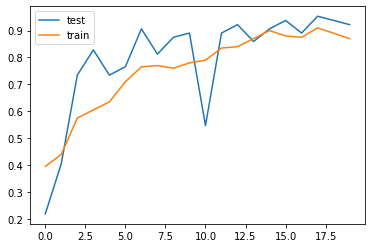

In [44]:
from matplotlib import pyplot
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [0]:
model.save('/content/drive/My Drive/Kuliah/Dicoding ML Path/ML Pemula/Model2.h5')

# Predict

Saving zdo3LHesq3aHmu1f.png to zdo3LHesq3aHmu1f.png
zdo3LHesq3aHmu1f.png
Scissor


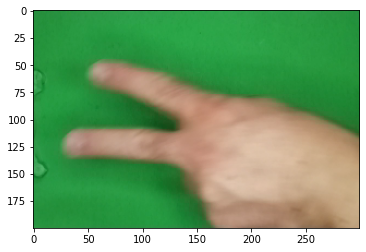

In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential, load_model
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  #load model
  lele = load_model('/content/drive/My Drive/Kuliah/Dicoding ML Path/ML Pemula/Model2.h5')

  images = np.vstack([x])
  classes = lele.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  if classes[0][1]==1:
    print('Rock')
  else:
    print('Scissor')